In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
%matplotlib inline

In [ ]:
mat = scipy.io.loadmat('OASBUD.mat')

In [ ]:
data = mat["data"].T

In [ ]:
data

array([[(array(['1mm'], dtype='<U3'), array([[ -1593,  -1263,   -268, ...,  -1258,   -895,      0],
               [     0,  -6548, -17424, ...,      0,      0,      0],
               [     0,  -8730, -23971, ...,      0,      0,  -8730],
               ...,
               [    22,     99,     62, ...,   -540,   -513,   -587],
               [   -77,     -3,    -53, ...,   -362,   -289,   -414],
               [  -163,   -117,   -179, ...,   -114,     33,    -74]], dtype=int16), array([[ -1314,  -1079,   -210, ...,  -1062,   -889,      0],
               [     0,  -6548, -17424, ...,      0,      0,      0],
               [     0,  -8730, -23971, ...,      0,      0,  -8730],
               ...,
               [   -61,    -45,    -59, ...,    -90,   -103,   -111],
               [   -98,    -82,   -129, ...,   -131,   -101,    -88],
               [  -150,   -137,   -160, ...,   -127,    -85,   -101]], dtype=int16), array([[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 

In [ ]:
d = data[0][0]["rf1"]

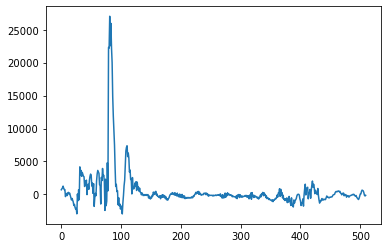

In [ ]:
t = np.arange(0,510,1)
plt.plot(t, d[900])

In [ ]:
# Constants
c = 1540  # speed of sound (m/s)
width = 38  # aperture width (mm)
fs = 40000000  # sampling frequency (Hz)

# Get RF data
rf = data[96]['rf1']

# Axes
z_axis = 1000 * np.linspace(0, rf.shape[0] * 0.5 * c / fs, rf.shape[0]) # depth axis in mm
y_axis = np.linspace(0, width, rf.shape[1])  # lateral axis in mm

# Envelope detection using Hilbert transform
analytic_signal = hilbert(rf, axis=0)
envelope_image = np.abs(analytic_signal)

# Log compression (dB scale)
envelope_image = 20 * np.log10(envelope_image + 1e-12)  # avoid log(0)

# Apply ROI mask (optional to extract only the tumor)
envelope_image = envelope_image * data[96]['roi1']

# Plot
plt.figure()
plt.imshow( envelope_image, extent=[y_axis.min(), y_axis.max(), z_axis.max(), z_axis.min()], cmap='gray', aspect='auto')
plt.xlabel("mm")
plt.ylabel("mm")
plt.colorbar(label="dB")
plt.show()